# Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('file:///D:/Data%20Science%20&%20AI/Praxis%20Data%20Science/Projects%20Praxis/Machine%20Learning%20Project/Banking%20Term%20Deposit/archive/train.csv',sep=',')
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (31647, 18)
No of instances after removing duplicates : (31647, 18)


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,Lower_Primary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,Higher_Education,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [2]:
#No Duplicates Found

# Defining Business Problems

# Identify Features Available In This Dataset

# Exploratory  Data Analysis

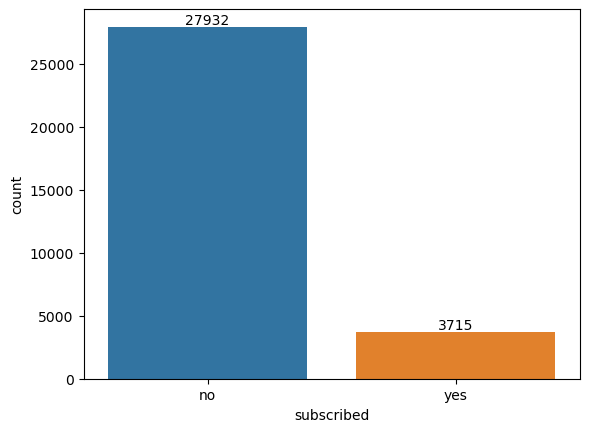

In [3]:
#Checking Target Variable Balanced or Imbalanced
b0=sns.countplot(x='subscribed',data=df)
for label in b0.containers:
    b0.bar_label(label)
plt.show()

In [4]:
#Found Dataset is imbalanced,we will treat this later by applying oversampling the minor class or using smote technique

In [5]:
#Checking basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df.describe(include='number')

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#ID-Irrelevant feature,later stage drop it.
#Age-Clients avg age 40 yrs
#Balance-large difference between min and max range so there might be outliers present in this feature.

In [8]:
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


In [9]:
#Blue collar job clients are highest
#Married clinets more
#Secondary education qualification clients are more
#Maximum no of clients alrdy having housing loan

In [10]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [11]:
#9 Categorical columns including dependent variable.
#9 integer columns

In [12]:
#drop irrelevant columns
df.drop('ID',inplace=True,axis=1)

In [13]:
#Renaming Columns for better understanding purpose
df.rename(columns={'pdays':'cust_last_contacted','poutcome':'previous_interaction'},inplace=True)

# Univariate Analysis

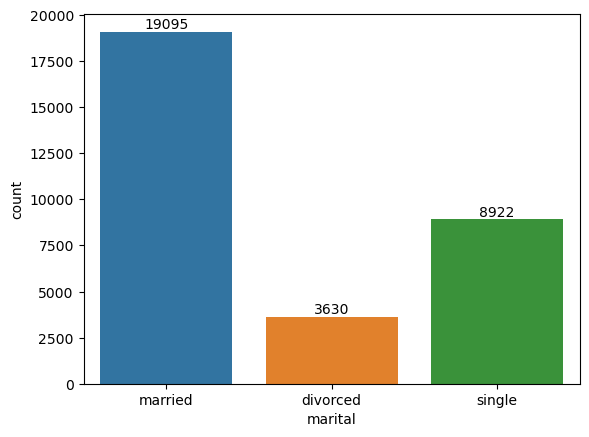

In [14]:
# Visualizing Categorical Variables
b1=sns.countplot(x='marital',data=df)
for label in b1.containers:
    b1.bar_label(label)
plt.show()

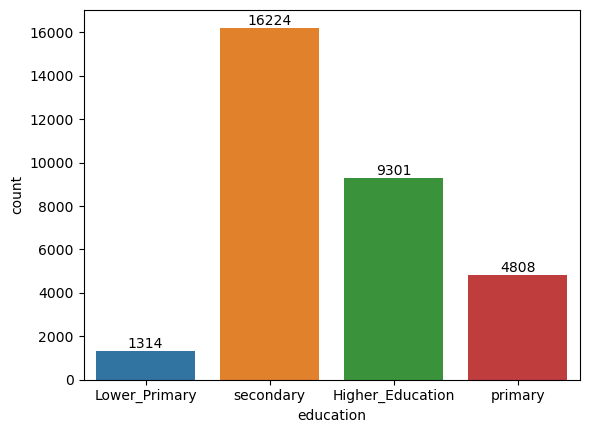

In [15]:
##Education
b2=sns.countplot(x='education',data=df)
for label in b2.containers:
    b2.bar_label(label)
plt.show()

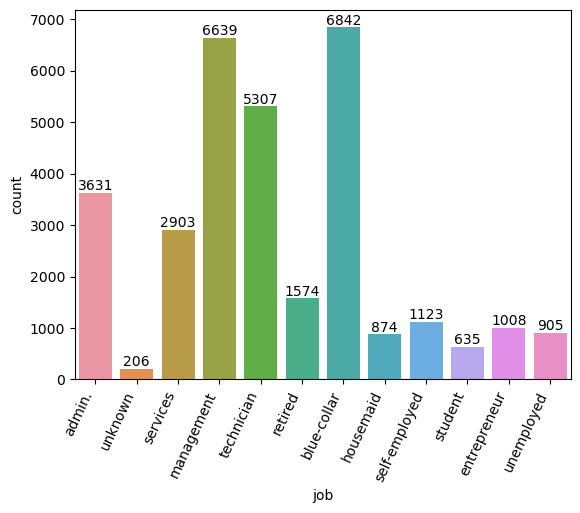

In [16]:
#Job
b3=sns.countplot(x='job',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b3.containers:
    b3.bar_label(label)
plt.show()

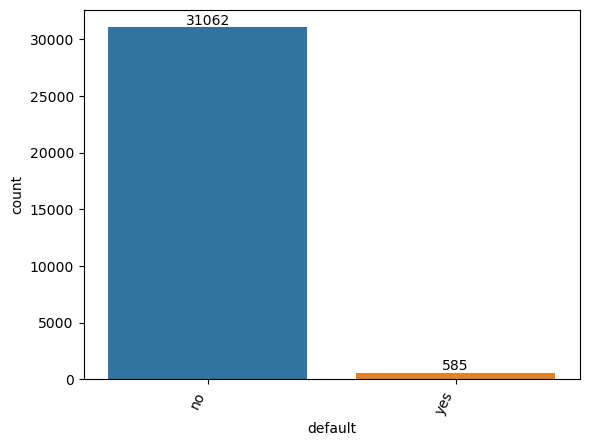

In [17]:
#default
b4=sns.countplot(x='default',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b4.containers:
    b4.bar_label(label)
plt.show()

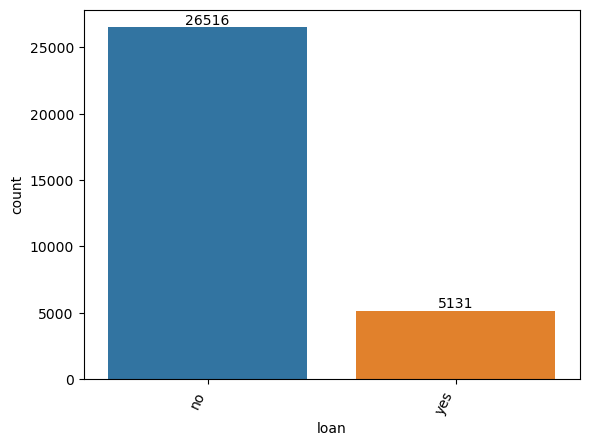

In [18]:
#Loan
b5=sns.countplot(x='loan',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b5.containers:
    b5.bar_label(label)
plt.show()

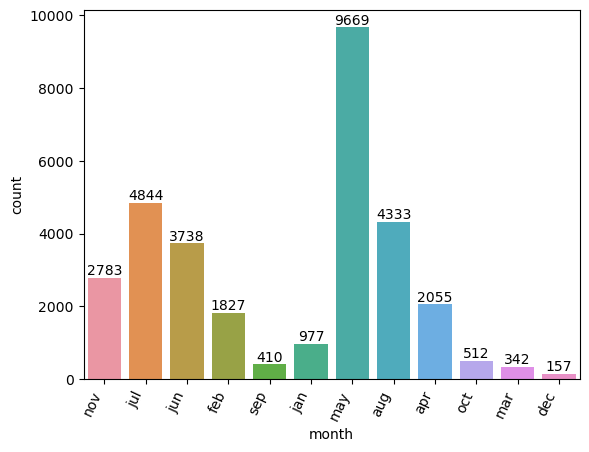

In [19]:
#Month
b6=sns.countplot(x='month',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b6.containers:
    b6.bar_label(label)
plt.show()

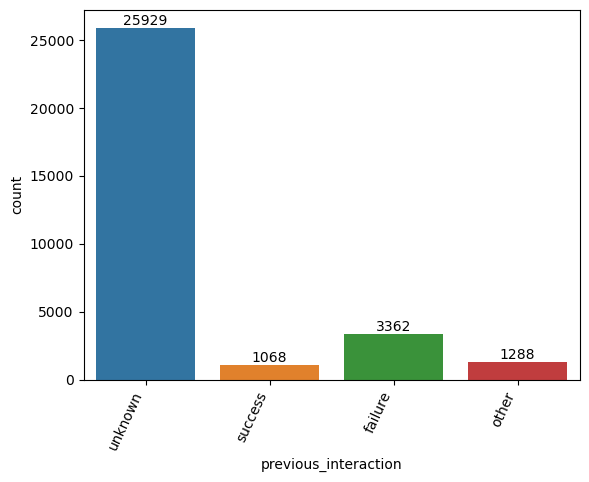

In [20]:
#Previcious outcome
b7=sns.countplot(x='previous_interaction',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b7.containers:
    b7.bar_label(label)
plt.show()

# Previous interaction with clients outcome result as success is not a good sign

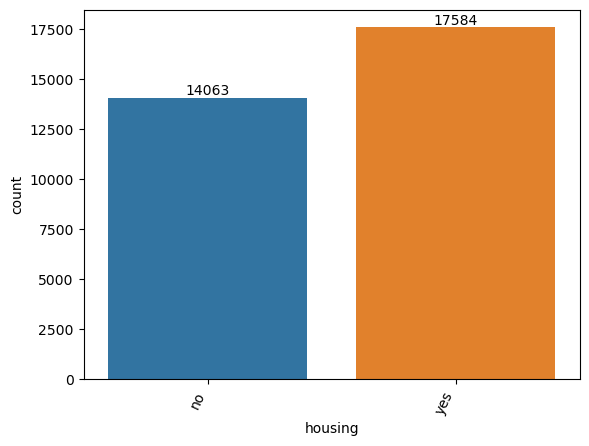

In [21]:
#Housing
b8=sns.countplot(x='housing',data=df)
plt.xticks(rotation=65, horizontalalignment='right')
for label in b8.containers:
    b8.bar_label(label)
plt.show()

In [22]:
cont_col=list(df[df.dtypes[df.dtypes=='int64'].index].columns)

C:\Users\dipam\AppData\Local\Temp\ipykernel_2140\3844355275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local\Temp\ipykernel_2140\3844355275.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\dipam\AppData\Local\T

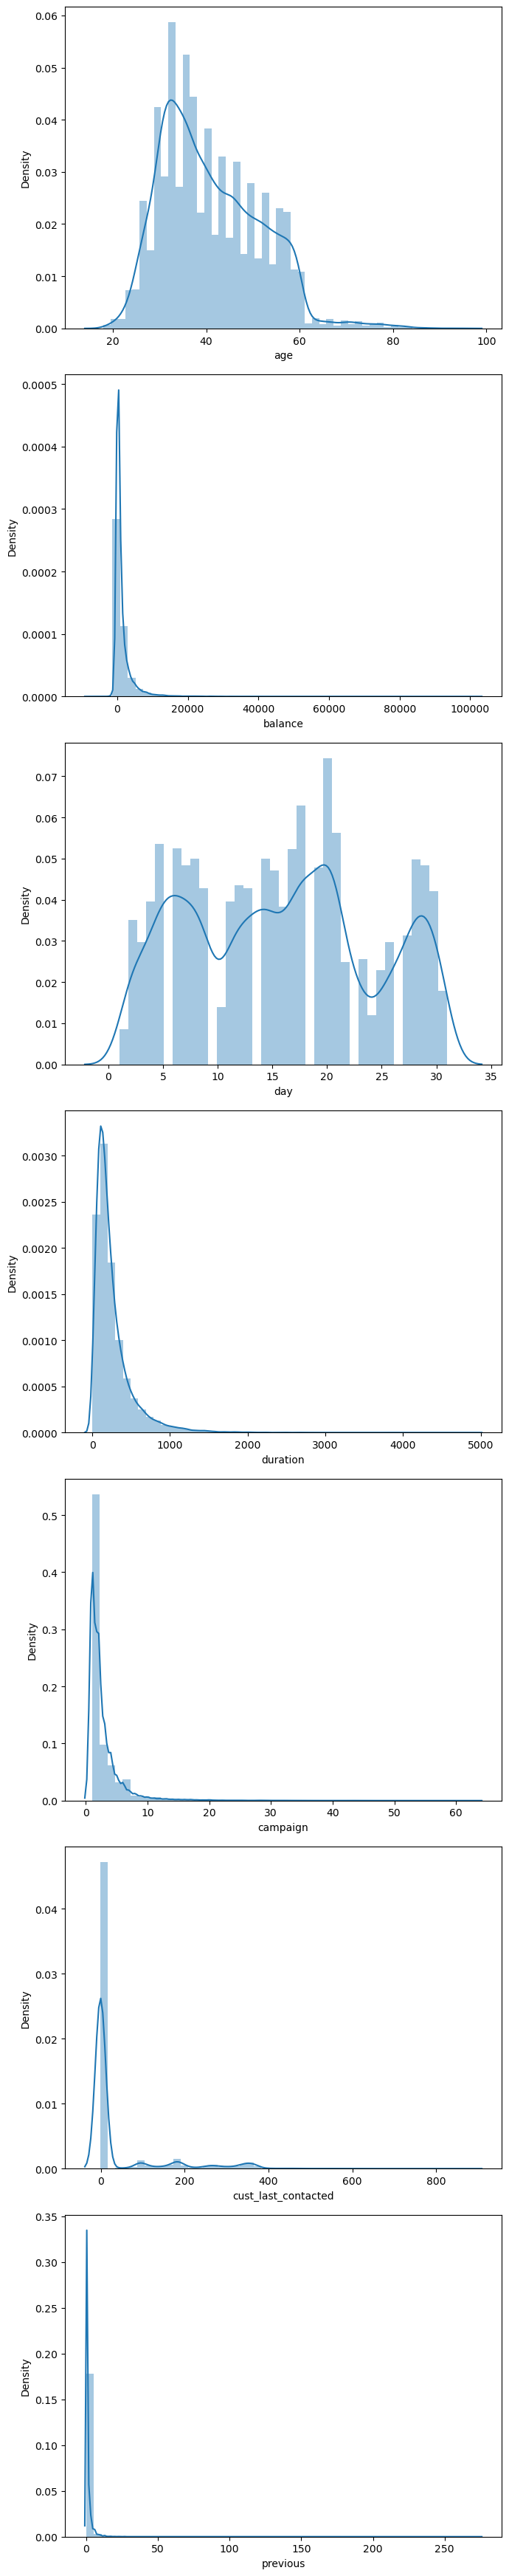

In [23]:
fig, axes = plt.subplots(len(cont_col), 1, figsize=(7, 5*len(cont_col)))

for i, col in enumerate(cont_col):
    sns.distplot(df[col], ax=axes[i])

plt.tight_layout()
plt.show()

## Missing Values

In [24]:
df.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
cust_last_contacted     0
previous                0
previous_interaction    0
subscribed              0
dtype: int64

In [25]:
#no missing values present

## checking outliers and if it is present we need to treat outliers

<Axes: >

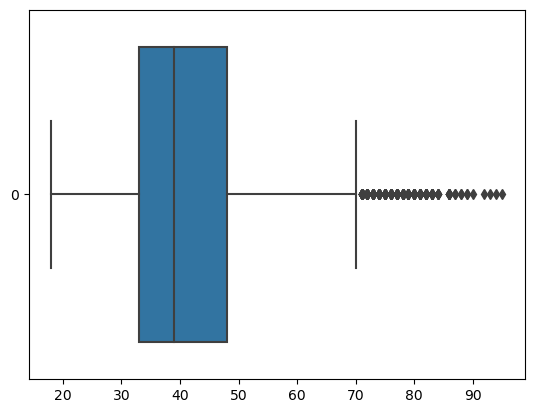

In [26]:
sns.boxplot(data=df['age'],orient='hue')

<Axes: >

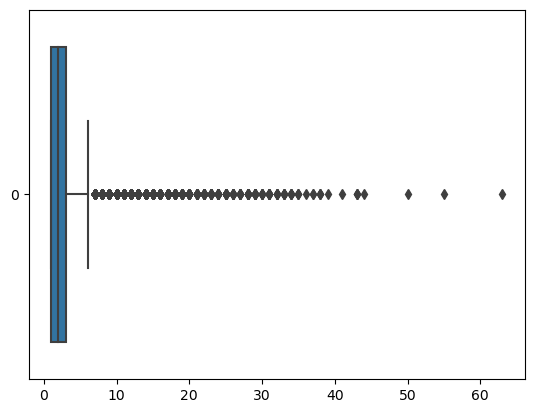

In [27]:
sns.boxplot(data=df['campaign'],orient='hue')

In [28]:
def outlier_findings(inpdata):
    quantile1, quantile3= np.percentile(inpdata,[25,75])
    print('Quartile 1 :',quantile1,'Quartile 3 :',quantile3)
    iqr_value=quantile3-quantile1
    
    print("Inter Quartile Range :",iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    
    print("Min Whisker :",lower_bound_val,"Max Whiker :",upper_bound_val)
    lower_outliers = np.where(inpdata < lower_bound_val)
    upper_outliers = np.where(inpdata > upper_bound_val)
    
    print("Number of values below the lower bound:", len(lower_outliers[0]))
    print("Number of values above the upper bound:", len(upper_outliers[0]))
    

In [29]:
outlier_findings(inpdata=df['age'])

Quartile 1 : 33.0 Quartile 3 : 48.0
Inter Quartile Range : 15.0
Min Whisker : 10.5 Max Whiker : 70.5
Number of values below the lower bound: 0
Number of values above the upper bound: 349


In [30]:
outlier_findings(inpdata=df['balance'])

Quartile 1 : 73.0 Quartile 3 : 1431.0
Inter Quartile Range : 1358.0
Min Whisker : -1964.0 Max Whiker : 3468.0
Number of values below the lower bound: 12
Number of values above the upper bound: 3287


In [31]:
outlier_findings(inpdata=df['duration'])

Quartile 1 : 104.0 Quartile 3 : 318.5
Inter Quartile Range : 214.5
Min Whisker : -217.75 Max Whiker : 640.25
Number of values below the lower bound: 0
Number of values above the upper bound: 2288


In [32]:
outlier_findings(inpdata=df['campaign'])

Quartile 1 : 1.0 Quartile 3 : 3.0
Inter Quartile Range : 2.0
Min Whisker : -2.0 Max Whiker : 6.0
Number of values below the lower bound: 0
Number of values above the upper bound: 2126


In [33]:
 outlier_findings(inpdata=df['cust_last_contacted'])

Quartile 1 : -1.0 Quartile 3 : -1.0
Inter Quartile Range : 0.0
Min Whisker : -1.0 Max Whiker : -1.0
Number of values below the lower bound: 0
Number of values above the upper bound: 5723


### Treating outliers with winsorization technique

We can impute outliers in various way like mean/median imputation,Winsorization, Turkey's hinge method. Here we are treating the outliers with Turkey's hinge method. Tukey's hinge method is a type of data transformation technique that involves Winsorizing a dataset at the 25th and 75th percentiles, also known as the hinges. The goal of Tukey's hinge method is to reduce the impact of outliers while preserving the central tendency and spread of the dataset.

In [34]:
cont_col1=df[['age',
 'balance',
 'day',
 'duration',
'campaign',
'cust_last_contacted']]

In [35]:
for i in cont_col1:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[i] = np.where(df[i] > upper_bound, upper_bound,np.where(df[i] < lower_bound,lower_bound,df[i]))

<Axes: >

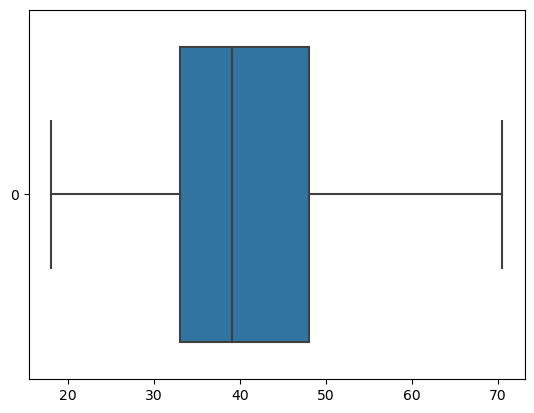

In [36]:
sns.boxplot(data=df['age'],orient='hue')

In [37]:
##Checking any further data cleaning require or not

In [38]:
cat_col=list(df[df.dtypes[df.dtypes=='object'].index].columns)

In [39]:
for i in cat_col:
    print(df[i].unique())

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
['married' 'divorced' 'single']
['Lower_Primary' 'secondary' 'Higher_Education' 'primary']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['telephone' 'cellular' 'unknown']
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
['unknown' 'success' 'failure' 'other']
['no' 'yes']


# Bivariate Analysis

## In this step we are analysing how categorical predictors have relstionship with target variable

### Q: Do married people are more concerned for the term deposit?

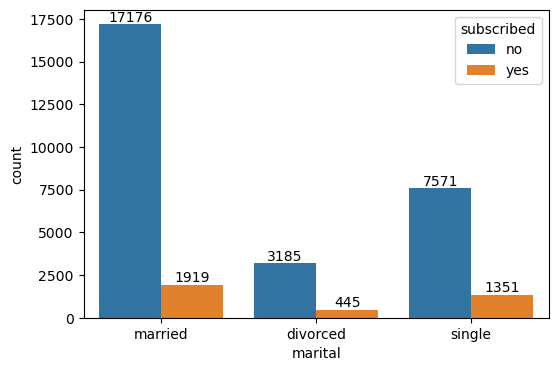

In [40]:
plt.figure(figsize=(6,4))
a1=sns.countplot(x='marital',data=df,hue='subscribed')
for label in a1.containers:
    a1.bar_label(label)
plt.show()

### Q:Does education one of the key reason to subscribe term deposit

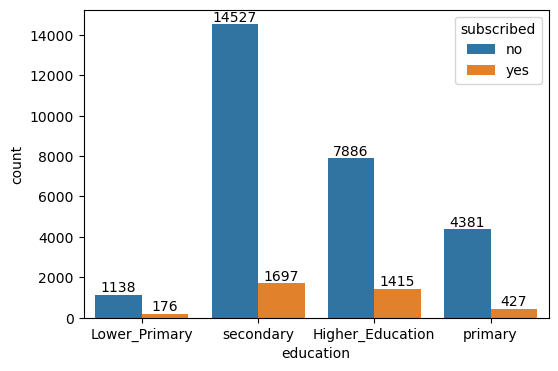

In [41]:
plt.figure(figsize=(6,4))
a2=sns.countplot(x='education',data=df,hue='subscribed')
for label in a2.containers:
    a2.bar_label(label)
plt.show()

### Q:Which Job type likely to subscribe for the fixed deposit

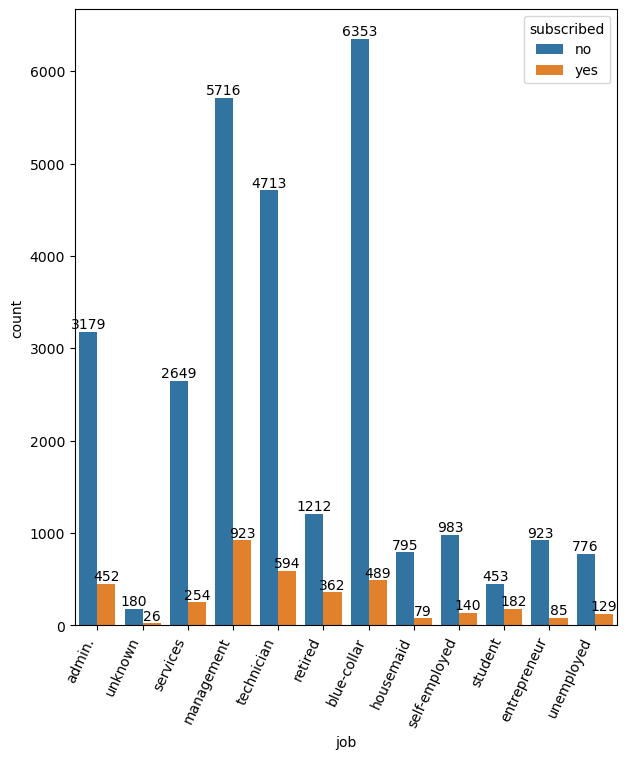

In [42]:
plt.figure(figsize=(7,8))
a3=sns.countplot(x='job',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a3.containers:
    a3.bar_label(label)
plt.show()


### Q:Previous loan defaulter risk status

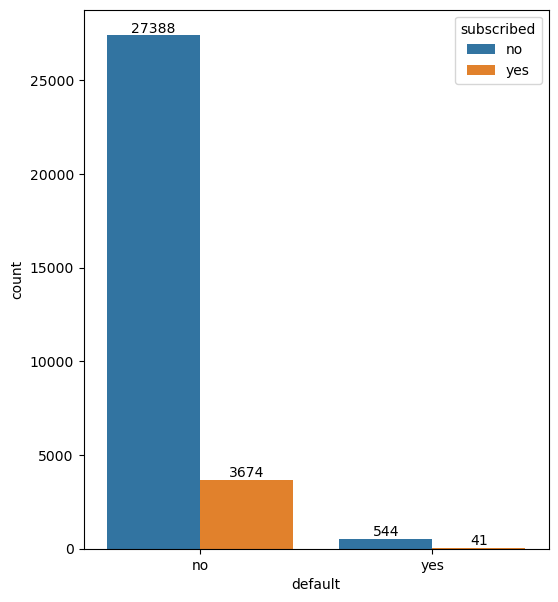

In [43]:
plt.figure(figsize=(6,7))
a4=sns.countplot(x='default',data=df,hue='subscribed',orient="v")
for label in a4.containers:
    a4.bar_label(label)
plt.show()

### Q:Does Previous housing loan effect the subscription of fixed deposit

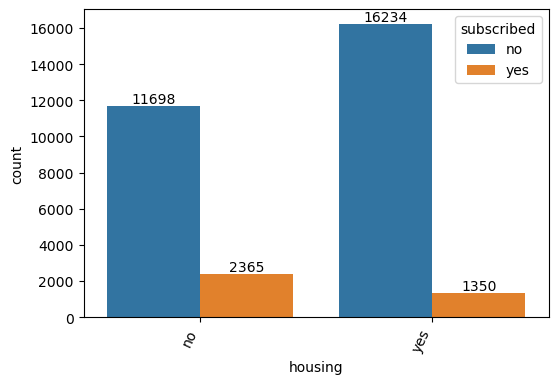

In [44]:
plt.figure(figsize=(6,4))
a9=sns.countplot(x='housing',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a9.containers:
    a9.bar_label(label)
plt.show()

### Q:Does Previous loan effect the subscription of fixed deposit

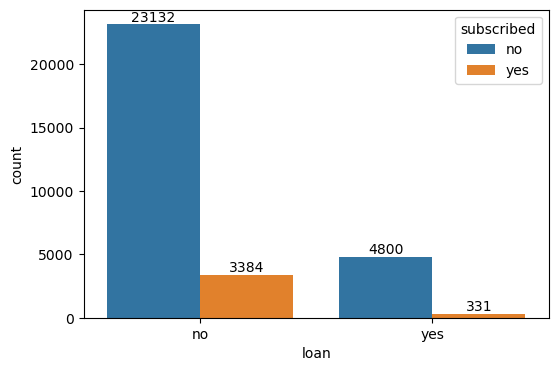

In [45]:
plt.figure(figsize=(6,4))
a5=sns.countplot(x='loan',data=df,hue='subscribed',orient="v")
for label in a5.containers:
    a5.bar_label(label)
plt.show()

### Q: In which Month Subscription is High

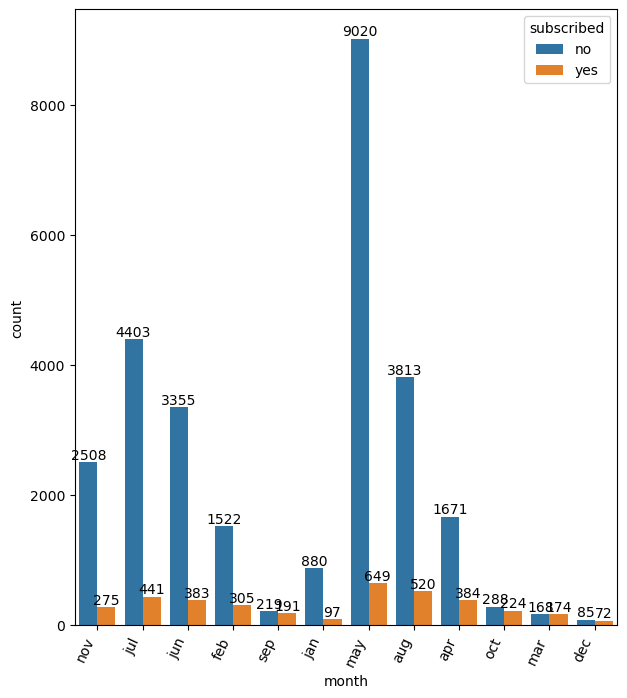

In [46]:
plt.figure(figsize=(7,8))
a7=sns.countplot(x='month',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a7.containers:
    a7.bar_label(label)
plt.show()

### Q:Previous Interation with client and Subscription Status

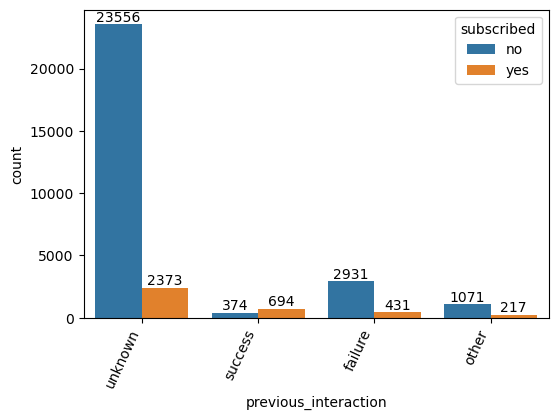

In [47]:
plt.figure(figsize=(6,4))
a8=sns.countplot(x='previous_interaction',data=df,hue='subscribed',orient="v")
plt.xticks(rotation=65, horizontalalignment='right')
for label in a8.containers:
    a8.bar_label(label)
plt.show()

### Which age group subscription is high

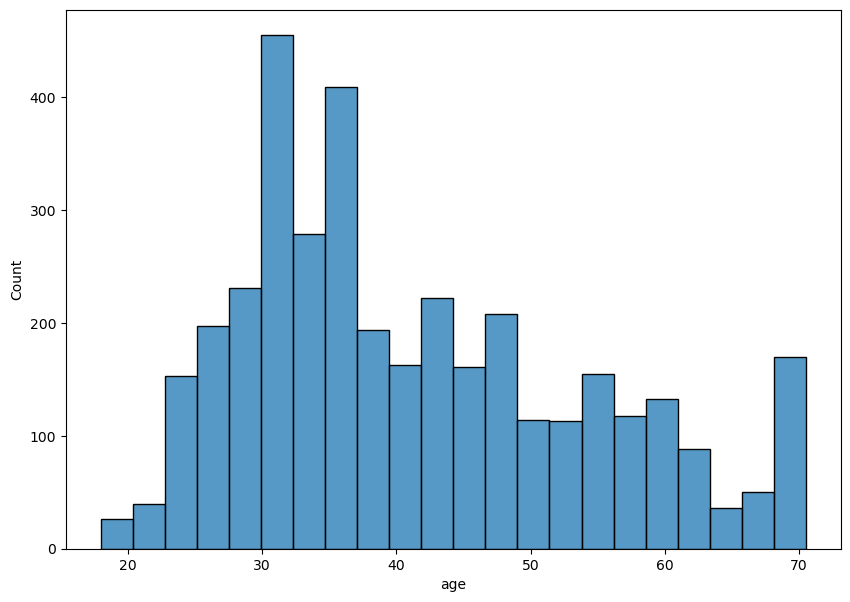

In [48]:
plt.figure(figsize=(10,7))
data1=df[df['subscribed']=='yes']
sns.histplot(x='age',data=data1)
plt.show()

from the above chart we can observed that the term deposit subscription age group is more between the age fgroup of 30-36 yrs approxmately

# Checking Correlation

C:\Users\dipam\AppData\Local\Temp\ipykernel_2140\3594340093.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

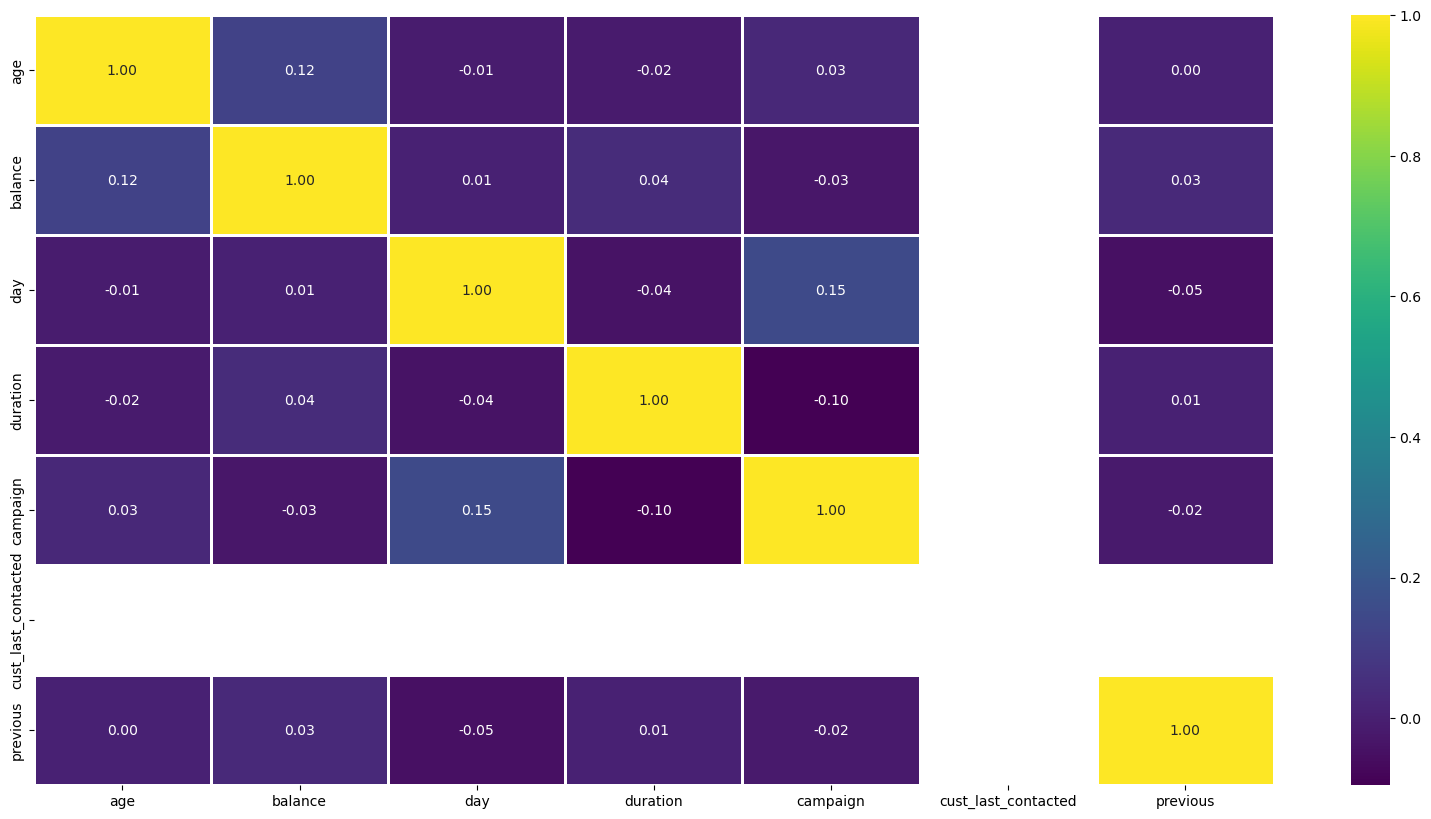

In [49]:
# CORRELATION PLOT

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidths=1.0, annot=True, fmt=".2f", cmap='viridis')
plt.show

From the above chart we can see that the not so much dependency with one variable with another

In [50]:
#calculating vif to check the multicollineairty range

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    
    non_numeric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    if non_numeric_cols:
        data = data.select_dtypes(include=np.number)
    

    if data.isnull().any().any():
        data = data.dropna()
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

vif_scores = calculate_vif(df)

print(vif_scores.sort_values(by="VIF"))


               Feature        VIF
6             previous   1.003568
3             duration   1.011767
0                  age   1.016832
1              balance   1.019234
2                  day   1.026945
4             campaign   1.033540
5  cust_last_contacted  24.131684


Above observation one feature found crossing multicollineairty limit 10,so we can drop this with this

# Treating Categorical Variables

In [51]:
#df['cust_last_contacted'].head(20)

In [52]:
df['subscribed']=df['subscribed'].replace({'yes': 1, 'no': 0})
df['education']=df['education'].replace({'Lower_Primary':0,'secondary':1,'Higher_Education':2,'primary':3})
df_dummies=pd.get_dummies(df,drop_first=True)

In [53]:
df_dummies.columns

Index(['age', 'education', 'balance', 'day', 'duration', 'campaign',
       'cust_last_contacted', 'previous', 'subscribed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'previous_interaction_other',
       'previous_interaction_success', 'previous_interaction_unknown'],
      dtype='object')

# Separating Target & Predictors

In [54]:
X = df_dummies.drop(['subscribed','cust_last_contacted'], axis = 1)
#X=df_dummies[['duration', 'previous', 'job_services', 'contact_telephone', 'month_aug', 'month_jul', 'month_jun', 'month_nov', 'month_oct', 'previous_interaction_other']]
#X=df_dummies[['balance', 'duration', 'campaign', 'cust_last_contacted', 'previous']]
#X=df_dummies[['age', 'balance', 'day', 'duration', 'campaign', 'previous','job_blue-collar', 'job_entrepreneur', 'job_management', 'job_services', 'job_technician', 'job_unemployed', 'job_unknown', 'default_yes', 'housing_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'previous_interaction_other']]
y = df_dummies['subscribed']

# Spliting Data into Train & Test

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5649)

In [56]:
from collections import Counter
print(Counter(y_train))

Counter({0: 20956, 1: 2779})


In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23735, 39), (7912, 39), (23735,), (7912,))

# Treating Target Variable

In [58]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [59]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [60]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({0: 20956, 1: 2779})
Counter({0: 20956, 1: 20956})


In [61]:
X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape

((41912, 39), (7912, 39), (41912,), (7912,))

# Feature Selection

In [62]:
#RFECV FOR FEATURE SELECTION

In [63]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# rfe = RFECV(estimator=model,cv=10,step=1)# Specify the desired number of features to select
# rfe.fit(X, y)
# selected_features = np.where(rfe.support_)[0]
# print("Selected feature indices:", selected_features.tolist())

In [64]:
# column_names = df_dummies.columns.tolist()
# index_numbers = [0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 17, 18, 19, 22, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38] 
# selected_columns = [column_names[i] for i in index_numbers]
# print("Selected columns:", selected_columns)

Since there is no accuracy betterment found out after feature selection has been done rather including all features give the better accuracy so we can skip this step

# Modeling Phase

In [65]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,roc_curve

In [127]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_score= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 score is :',F1_score )
    print('precision score is :',precision )
    print('recall score is :',recall )
    sns.heatmap(cm,annot=True,cmap='Purples',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_os,y_train_os)
y_predLRtrain=LR.predict(X_train_os)
y_predLR=LR.predict(X_test)

accuracy score is : 0.8290227142584463
F1 score is : 0.8290210693090949
precision score is : 0.8269942141705396
recall score is : 0.832124451231151


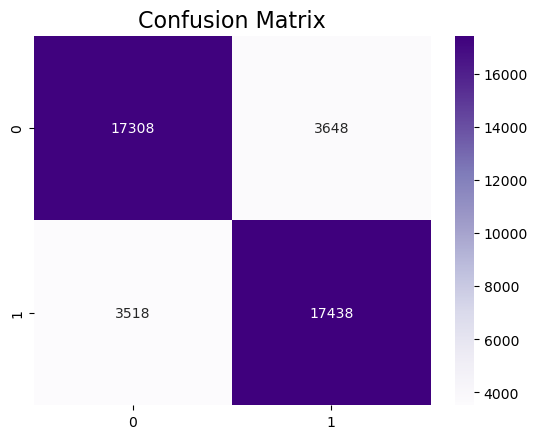

In [129]:
classification_metrics(y_train_os,y_predLRtrain)

accuracy score is : 0.8349342770475228
F1 score is : 0.7229653551729378
precision score is : 0.40493319630010277
recall score is : 0.8418803418803419


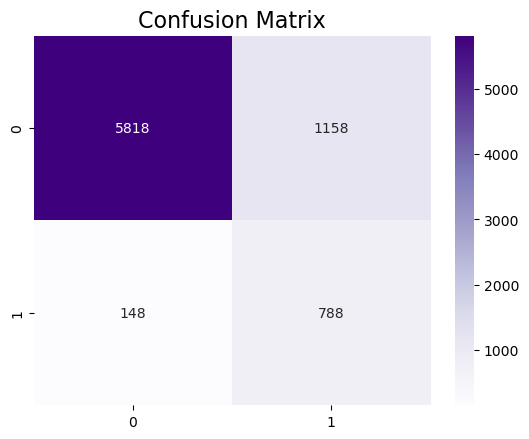

In [130]:
classification_metrics(y_test,y_predLR)

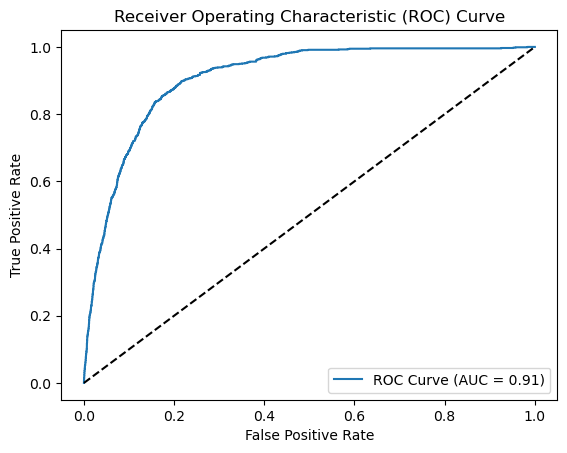

In [131]:
y_pred_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classification
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Identifying which coefficients domination most

In [132]:
coefficients = LR.coef_[0]
feature_names = np.arange(X_train_os.shape[1])

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print(coefficients_df)

dominating_feature = coefficients_df.iloc[0]['Feature']
dominating_coefficient = coefficients_df.iloc[0]['Coefficient']
print("Dominating Feature:", dominating_feature)
print("Dominating Coefficient:", dominating_coefficient)

less_dominating_feature = coefficients_df.iloc[-1]['Feature']
less_dominating_coefficient = coefficients_df.iloc[-1]['Coefficient']
print("Less Dominating Feature:", less_dominating_feature)
print("Less Dominating Coefficient:", less_dominating_coefficient)

    Feature  Coefficient
4         4     5.302582
37       37     2.589677
31       31     1.900464
34       34     1.315351
6         6     1.010789
35       35     0.844931
2         2     0.776673
14       14     0.508026
26       26     0.272684
3         3     0.179936
19       19     0.157930
0         0     0.068478
23       23     0.062096
36       36     0.050336
11       11     0.011017
30       30    -0.062545
1         1    -0.070367
10       10    -0.082514
20       20    -0.103520
15       15    -0.143512
27       27    -0.201142
38       38    -0.225754
18       18    -0.267912
16       16    -0.332236
13       13    -0.383049
9         9    -0.469667
7         7    -0.486581
8         8    -0.489699
12       12    -0.519550
22       22    -0.574254
5         5    -0.605848
17       17    -0.649664
21       21    -0.781201
32       32    -0.881156
25       25    -0.984821
33       33    -1.158110
29       29    -1.289655
24       24    -1.522138
28       28    -1.572223


In [71]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37,31,34,35]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'month_jul' 'month_may' 'month_nov']


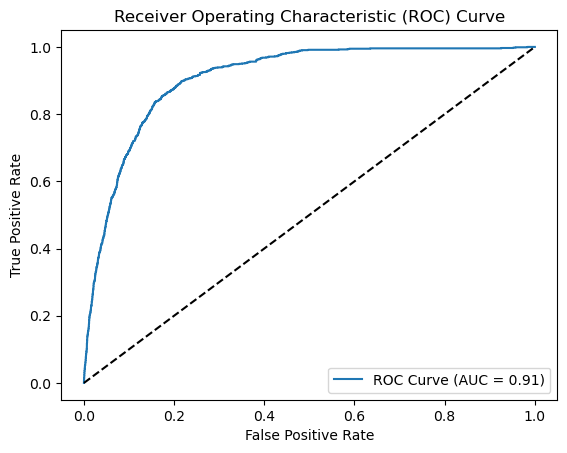

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_LR = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_LR)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(max_depth=10,n_estimators=900,criterion='gini',min_samples_leaf=1,min_samples_split=5)
RFC.fit(X_train_os,y_train_os)
y_predRFCTrain=RFC.predict(X_train_os)
y_predRFC=RFC.predict(X_test)

accuracy score is : 0.8863809887383088
F1 score is : 0.886177528909781
precision score is : 0.8562565997888067
recall score is : 0.9286600496277916


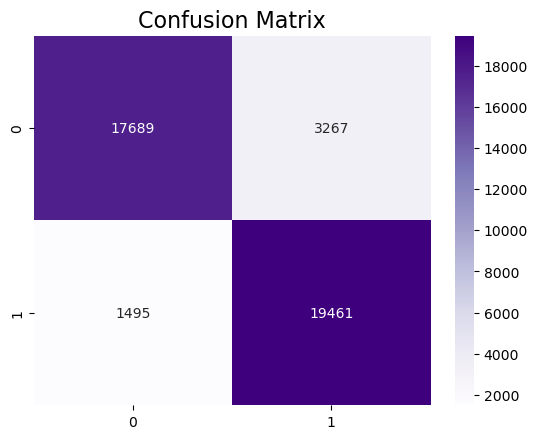

In [135]:
classification_metrics(y_train_os,y_predRFCTrain)

accuracy score is : 0.8410010111223458
F1 score is : 0.7325698379560592
precision score is : 0.4169246646026832
recall score is : 0.8632478632478633


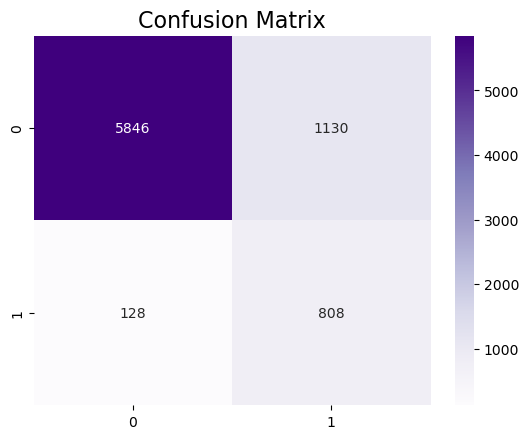

In [136]:
classification_metrics(y_test,y_predRFC) 

# Feature Importance

Top 10 Feature Ranking:
1. Feature 4: Importance 0.47525288660801207
2. Feature 37: Importance 0.0773498229446962
3. Feature 24: Importance 0.06243060707019965
4. Feature 21: Importance 0.04445653086616653
5. Feature 0: Importance 0.04341997646560346
6. Feature 2: Importance 0.03431547055177986
7. Feature 6: Importance 0.03295900870490365
8. Feature 38: Importance 0.025863480711037685
9. Feature 3: Importance 0.02560472933544493
10. Feature 31: Importance 0.02117129534610403


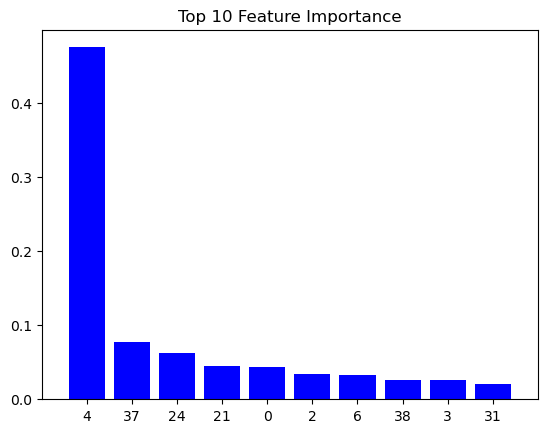

In [148]:
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 10 Feature Ranking:")
for f in range(10):
    feature_index = indices[f]
    feature_importance = importances[feature_index]
    print(f"{f+1}. Feature {feature_index}: Importance {feature_importance}")

import matplotlib.pyplot as plt

plt.figure()
plt.title("Top 10 Feature Importance")
plt.bar(range(10), importances[indices[:10]], color="b", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()


In [76]:
column_names = df_dummies.columns.tolist()
index_numbers = [4,37, 24,21,0,6,2,3,38,31]  
selected_columns = [column_names[i] for i in index_numbers]
print("Selected columns:", np.array(selected_columns))

Selected columns: ['duration' 'month_sep' 'loan_yes' 'marital_single' 'age'
 'cust_last_contacted' 'balance' 'day' 'previous_interaction_other'
 'month_jul']


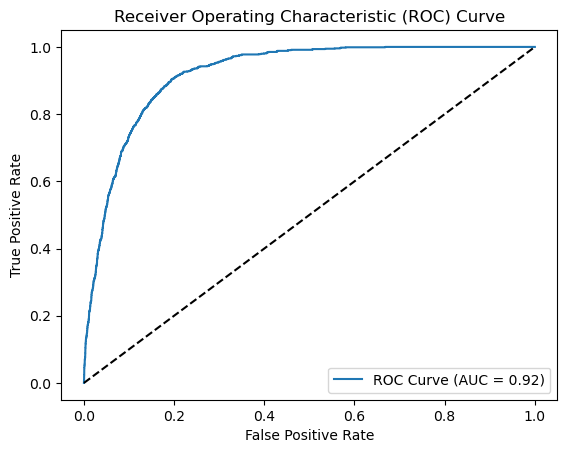

In [104]:
y_pred_prob = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_RFC = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_RFC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Applying Optuna For Hyperparameter Tuning

In [77]:
import optuna
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-18 17:52:52,304] A new study created in memory with name: no-name-416e59f9-7537-42c6-a578-e74734542a27
[I 2023-06-18 17:53:08,044] Trial 0 finished with value: 0.8200202224469161 and parameters: {'criterion': 'entropy', 'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8200202224469161.
[I 2023-06-18 17:53:23,198] Trial 1 finished with value: 0.8091506572295247 and parameters: {'criterion': 'gini', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8200202224469161.
[I 2023-06-18 17:53:28,487] Trial 2 finished with value: 0.7976491405460061 and parameters: {'criterion': 'entropy', 'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8200202224469161.
[I 2023-06-18 17:53:31,502] Trial 3 finished with value: 0.8094034378159757 and parameters: {'criterion': 'gini', 'n_estimators': 200, 'ma

Best hyperparameters: {'criterion': 'gini', 'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 1}


# Adaboost

In [142]:
from sklearn.ensemble import AdaBoostClassifier
ADAC=AdaBoostClassifier(n_estimators=250, learning_rate=0.7)
ADAC.fit(X_train_os,y_train_os)
y_predADACTrain=ADAC.predict(X_train_os)
y_predADAC=ADAC.predict(X_test)

accuracy score is : 0.8355602214163008
F1 score is : 0.8355260632779008
precision score is : 0.8455188679245284
recall score is : 0.8211490742508112


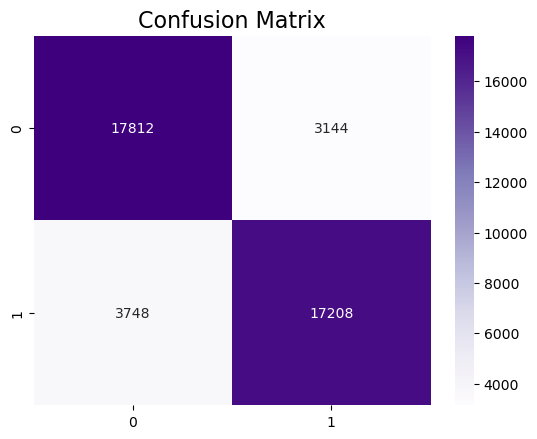

In [143]:
classification_metrics(y_train_os,y_predADACTrain)

accuracy score is : 0.8499747219413549
F1 score is : 0.7375028799361435
precision score is : 0.4301613800779076
recall score is : 0.8258547008547008


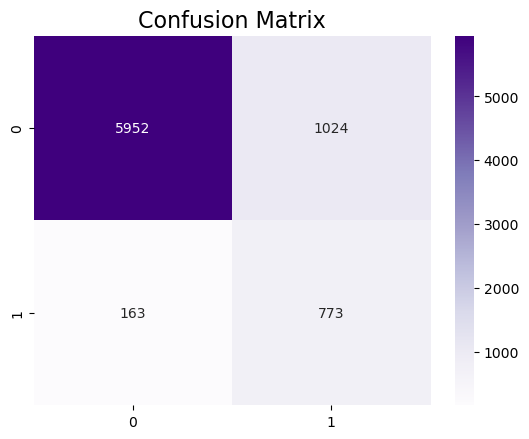

In [144]:
classification_metrics(y_test,y_predADAC)

# Applying Optuna For Hyperparameter Tuning

In [81]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-18 18:13:22,731] A new study created in memory with name: no-name-3429b154-fee9-4932-af2b-e65c7ea250bd
[I 2023-06-18 18:13:45,736] Trial 0 finished with value: 0.8485844287158746 and parameters: {'n_estimators': 500, 'learning_rate': 0.4014906906913175}. Best is trial 0 with value: 0.8485844287158746.
[I 2023-06-18 18:13:57,667] Trial 1 finished with value: 0.8451718907987866 and parameters: {'n_estimators': 250, 'learning_rate': 0.19745538514549704}. Best is trial 0 with value: 0.8485844287158746.
[I 2023-06-18 18:14:21,246] Trial 2 finished with value: 0.8485844287158746 and parameters: {'n_estimators': 500, 'learning_rate': 0.31548818899730807}. Best is trial 0 with value: 0.8485844287158746.
[I 2023-06-18 18:14:44,639] Trial 3 finished with value: 0.8422649140546006 and parameters: {'n_estimators': 500, 'learning_rate': 0.04703372302347492}. Best is trial 0 with value: 0.8485844287158746.
[I 2023-06-18 18:14:53,986] Trial 4 finished with value: 0.8143326592517695 and par

Best hyperparameters: {'n_estimators': 400, 'learning_rate': 0.9843748611169559}


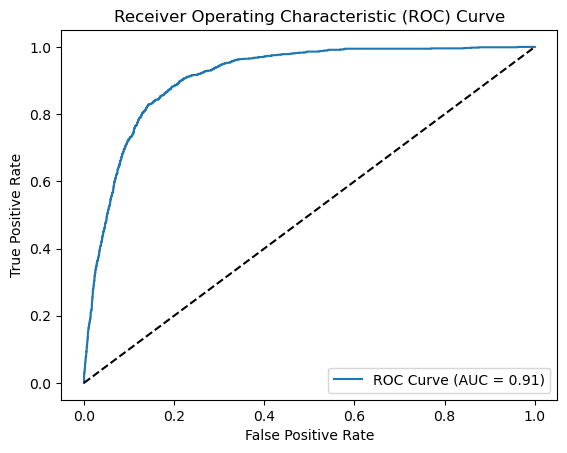

In [100]:
y_pred_prob = ADAC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_adac = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_adac)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=10,min_samples_leaf=3,min_samples_split=7,criterion='gini')
DTC.fit(X_train_os,y_train_os)
y_predDTCTrain=DTC.predict(X_train_os)
y_predDTC=DTC.predict(X_test)

accuracy score is : 0.8746659667875549
F1 score is : 0.8745837659147309
precision score is : 0.8564165418312225
recall score is : 0.9002672265699561


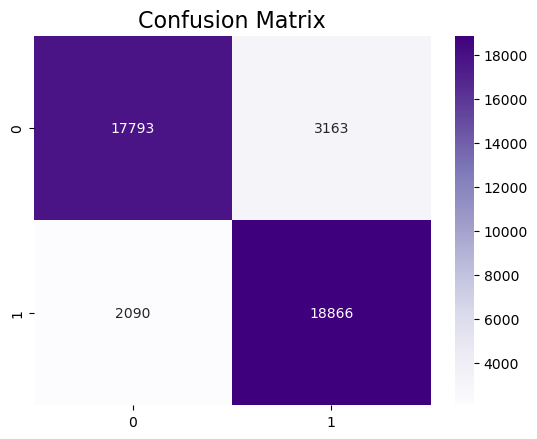

In [150]:
classification_metrics(y_train_os,y_predDTCTrain)

accuracy score is : 0.8410010111223458
F1 score is : 0.7325698379560592
precision score is : 0.4169246646026832
recall score is : 0.8632478632478633


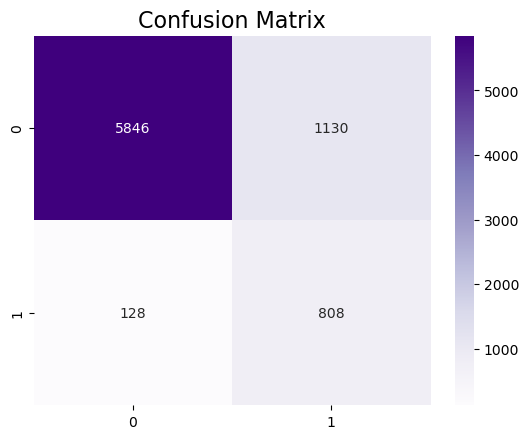

In [147]:
classification_metrics(y_test,y_predDTC)

In [85]:
import optuna
def objective(trial):
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

    model.fit(X_train_os, y_train_os)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best hyperparameters: {}".format(best_params))


[I 2023-06-18 18:18:50,313] A new study created in memory with name: no-name-11d2e0cc-c8cf-4cda-a14b-4c3efaaa44f6
[I 2023-06-18 18:18:50,476] Trial 0 finished with value: 0.8135743174924166 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8135743174924166.
[I 2023-06-18 18:18:50,656] Trial 1 finished with value: 0.8032103134479271 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8135743174924166.
[I 2023-06-18 18:18:50,836] Trial 2 finished with value: 0.8337967644084934 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.8337967644084934.
[I 2023-06-18 18:18:50,925] Trial 3 finished with value: 0.7286400404448938 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 2 wit

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3}


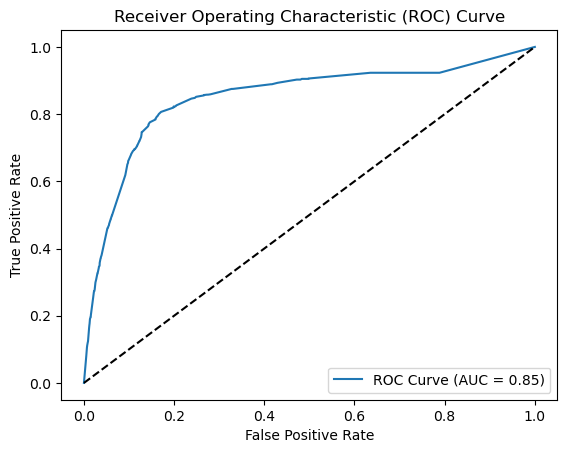

In [151]:
y_pred_prob = DTC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_DTC = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_DTC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Comparing Model Performance

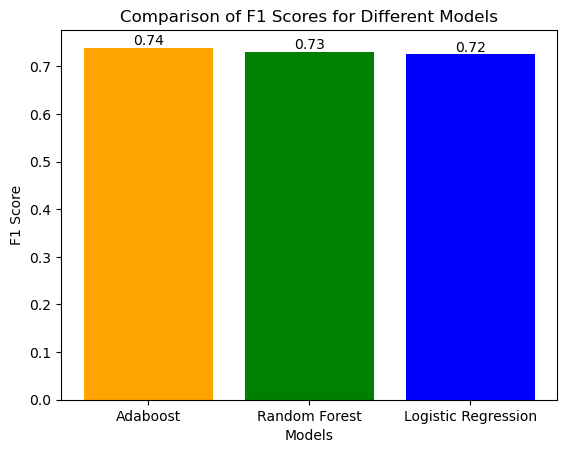

In [86]:
import matplotlib.pyplot as plt
f1_scores = [0.7388180751342295, 0.7305898462793079, 0.7246516140708592]
model_labels = ['Adaboost', 'Random Forest', 'Logistic Regression']
x_ticks = range(len(model_labels))
colors = ['orange', 'green', 'blue']

plt.bar(x_ticks, f1_scores, color=colors)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.xticks(x_ticks, model_labels)

for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
plt.show()

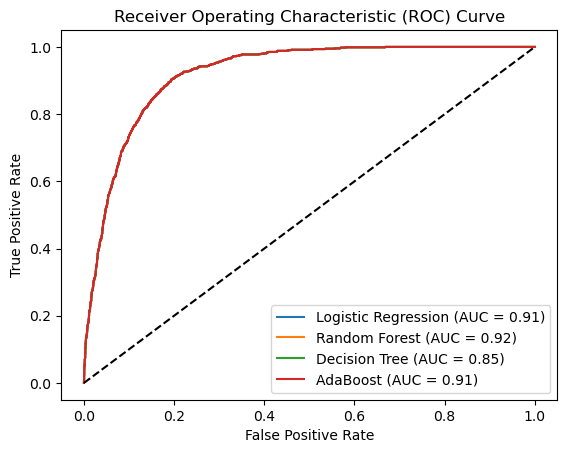

In [105]:
# Plot ROC curves
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_LR)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % auc_RFC)
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc_DTC)
plt.plot(fpr, tpr, label='AdaBoost (AUC = %0.2f)' % auc_adac)

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Conclusion

Among these 4 models Adaboost gave slightly betteer result f1 score wise but Random forest give AUC better but logistic regression is easily interpretable and we can get an idea which 
coefficients dominate more,by interpreting this coefficients business can identify and take decision based on this,Below are the few
informations regarding those coefficients are dominating more 

Based on the coefficients obtained from your logistic regression model, we can interpret the impact of each feature on the prediction of fixed deposit subscription. Here's the interpretation and Answered earlier business related queries with Answers: